# OpenClassrooms - parcours Data Analyst Business Intelligence - P8

# Milestone 1 - Analyse des données

Dans cette partie nous allons analyser le jeu de données que nous avons à notre disposition. Notre objectif est de comprendre les relations entre les variables, et surtout, celles qui influent sur le prix des transactions immobilières. Grâce à ce travail, nous pourrons ne conserver que les variables qui seront utiles à l'apprentissage de notre algorithme.

## 1.Type des données

La première étape à réaliser est d'importer les données dans le notebook et d'opérer des transformations sur les variables si celles-ci s'imposent (exemple : nettoyage ou changement de type des variables, etc.).

In [1]:
#On importe les librairies que nous utiliserons pour traiter les données et les visualiser
import pandas as pd, numpy as np, datetime, scipy
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.pyplot import cm # pour le graphique "rainbow"
from scipy import stats # pour les tests de corrélation Shapiro-Wilk et Spearman
# N'oubliez pas d'avoir installé les librairies pandas, numpy, matplotlib, scipy, scikit-learn
# via la commande pip ou la commande pipenv

In [2]:
#On importe les données dans un dataframe
df_immo = pd.read_excel("historique_immobilier_paris_2017_2021_vdef2.xlsx")

Attention, si l'opération ci-dessus ne marche pas, il se peut que le package "openpyxl" ne soit pas présent sur votre ordinateur. Si c'est le cas vous pouvez l'installer en éxécutant la commande : pip install openpyxl ou pipenv install openxyl ou conda install openpyxl.

In [3]:
#On vérifie que le type des données attribué par pandas est cohérent
df_immo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26196 entries, 0 to 26195
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date_mutation     26196 non-null  datetime64[ns]
 1   valeur_fonciere   26196 non-null  float64       
 2   adresse_numero    26196 non-null  int64         
 3   adresse_nom_voie  26196 non-null  object        
 4   code_postal       26196 non-null  int64         
 5   nom_commune       26196 non-null  object        
 6   code_type_local   26196 non-null  int64         
 7   type_local        26196 non-null  object        
 8   surface_reelle    26196 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 1.8+ MB


In [4]:
len(df_immo['valeur_fonciere'].unique())

26120

Remarque: certaines valeurs foncières sont identiques.

In [5]:
# affichage à 3 chiffres après la virgule:
pd.options.display.float_format = '{:.3f}'.format
df_immo.head()

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle
0,2017-01-03,550559.678,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50
1,2017-01-12,1576492.459,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163
2,2017-01-10,657757.356,52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,66
3,2017-01-10,250086.823,64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,Appartement,22
4,2017-01-13,176266.708,25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,Appartement,15


Corrections à effectuer: 
    
adresse_numero -> object (pour prendre en compte les éventuels bis et ter)
    
surface_reelle -> float64 (pour prendre en compte les éventuels surfaces avec des m2 incomplets).

Egalement, on rectifie/précise le type de certaines données pour que la base de données ne soit pas 
surdimmensionnée et prenne moins de place.


In [6]:
df_immo = df_immo.astype({'adresse_numero': object, 'surface_reelle': np.float16, 
                          'valeur_fonciere': np.float32,
                          'code_postal':np.uint32, 'code_type_local':np.uint8}, copy=False)
df_immo.dtypes

date_mutation       datetime64[ns]
valeur_fonciere            float32
adresse_numero              object
adresse_nom_voie            object
code_postal                 uint32
nom_commune                 object
code_type_local              uint8
type_local                  object
surface_reelle             float16
dtype: object

In [7]:
df_immo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26196 entries, 0 to 26195
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date_mutation     26196 non-null  datetime64[ns]
 1   valeur_fonciere   26196 non-null  float32       
 2   adresse_numero    26196 non-null  object        
 3   adresse_nom_voie  26196 non-null  object        
 4   code_postal       26196 non-null  uint32        
 5   nom_commune       26196 non-null  object        
 6   code_type_local   26196 non-null  uint8         
 7   type_local        26196 non-null  object        
 8   surface_reelle    26196 non-null  float16       
dtypes: datetime64[ns](1), float16(1), float32(1), object(4), uint32(1), uint8(1)
memory usage: 1.3+ MB


In [8]:
# Recherche des doublons
transacs = ['date_mutation','valeur_fonciere','code_postal','adresse_nom_voie']
df_immo.loc[df_immo[transacs].duplicated(keep=False),:]


,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle
196,2017-05-18,246703.312,400,RUE SAINT HONORE,75001,Paris 1er Arrondissement,4,Local industriel. commercial ou assimilé,19.000
209,2017-05-18,246703.312,400,RUE SAINT HONORE,75001,Paris 1er Arrondissement,4,Local industriel. commercial ou assimilé,19.000
375,2017-10-17,855144.875,71,RUE D AMSTERDAM,75008,Paris 8e Arrondissement,2,Appartement,82.000
376,2017-10-17,855144.875,71,RUE D AMSTERDAM,75008,Paris 8e Arrondissement,2,Appartement,82.000
1061,2017-12-28,148485.375,6,RUE BLAINVILLE,75005,Paris 5e Arrondissement,2,Appartement,13.000
1063,2017-12-28,148485.375,6,RUE BLAINVILLE,75005,Paris 5e Arrondissement,2,Appartement,13.000
2768,2017-01-04,885116.625,8,RUE PAUL HERVIEU,75015,Paris 15e Arrondissement,2,Appartement,98.000
2775,2017-01-04,885116.625,8,RUE PAUL HERVIEU,75015,Paris 15e Arrondissement,2,Appartement,98.000
3435,2017-05-16,108677.312,7,RUE DOCTEUR GERMAIN SEE,75016,Paris 16e Arrondissement,2,Appartement,11.000
3436,2017-05-16,108677.312,7,RUE DOCTEUR GERMAIN SEE,75016,Paris 16e Arrondissement,2,Appartement,11.000


In [9]:
# calcul du nombres de lignes faisant partie de doublons:
df_immo_doubles = df_immo.loc[df_immo[transacs].duplicated(keep=False),:]
df_immo_doubles['type_local'].value_counts()

type_local
Appartement                                 32
Local industriel. commercial ou assimilé     2
Name: count, dtype: int64

In [10]:
# effacement des doublons:
df_immo.drop_duplicates(subset = transacs, keep='first', inplace = True)

In [11]:
# vérification du bon effacement des doublons:
df_immo.loc[df_immo[transacs].duplicated(keep=False),:]

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle


In [12]:
df_immo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26179 entries, 0 to 26195
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date_mutation     26179 non-null  datetime64[ns]
 1   valeur_fonciere   26179 non-null  float32       
 2   adresse_numero    26179 non-null  object        
 3   adresse_nom_voie  26179 non-null  object        
 4   code_postal       26179 non-null  uint32        
 5   nom_commune       26179 non-null  object        
 6   code_type_local   26179 non-null  uint8         
 7   type_local        26179 non-null  object        
 8   surface_reelle    26179 non-null  float16       
dtypes: datetime64[ns](1), float16(1), float32(1), object(4), uint32(1), uint8(1)
memory usage: 1.5+ MB


### 2. Regardons les différents types de biens immobiliers que nous avons dans nos données :

In [13]:
print('la liste des différents types de biens immobiliers que nous avons dans les données est :')
df_immo['type_local'].value_counts()

la liste des différents types de biens immobiliers que nous avons dans les données est :


type_local
Appartement                                 24337
Local industriel. commercial ou assimilé     1842
Name: count, dtype: int64

In [14]:
print('Leurs codes type sont:')
df_immo['code_type_local'].value_counts()

Leurs codes type sont:


code_type_local
2    24337
4     1842
Name: count, dtype: int64

On observe qu'il y a 2 types de biens, et que leurs codes types sont Appartement: 2, Local Industriel, commercial ou assimilé: 4. 

### 3. Nombre de transactions

In [15]:
#On verifie le nombre de transactions que nous avons dans notre dataframe
print('le nombre de transactions dans les données est {}'.format(df_immo.shape[0]))
print('le nombre de transactions pour les appartements dans les données est {}'.format(
    df_immo.type_local.value_counts()[0]))
print('le nombre de transactions pour les locaux commerciaux dans les données est {}'.format(
    df_immo.type_local.value_counts()[1]))

le nombre de transactions dans les données est 26179
le nombre de transactions pour les appartements dans les données est 24337
le nombre de transactions pour les locaux commerciaux dans les données est 1842


### 4. Intervalle de l'historique des données

In [16]:
df_immo.sort_values('date_mutation', ascending = True)

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle
2765,2017-01-02,1161155.500,3,RUE ANTOINE BOURDELLE,75015,Paris 15e Arrondissement,2,Appartement,126.000
3291,2017-01-02,407992.281,8,AV DU GAL BALFOURIER,75016,Paris 16e Arrondissement,2,Appartement,43.000
0,2017-01-03,550559.688,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50.000
1579,2017-01-03,716635.500,53,RUE DE LA ROQUETTE,75011,Paris 11e Arrondissement,2,Appartement,80.000
1580,2017-01-03,731040.250,53,RUE DE LA ROQUETTE,75011,Paris 11e Arrondissement,2,Appartement,80.000
...,...,...,...,...,...,...,...,...,...
23419,2021-12-30,435537.812,34,RUE ORDENER,75018,Paris 18e Arrondissement,2,Appartement,45.000
23386,2021-12-30,170748.156,9,RUE ROBERT PLANQUETTE,75018,Paris 18e Arrondissement,2,Appartement,18.000
23454,2021-12-31,408204.719,80,RUE LA CONDAMINE,75017,Paris 17e Arrondissement,4,Local industriel. commercial ou assimilé,36.000
25003,2021-12-31,769860.000,9,RUE SURCOUF,75007,Paris 7e Arrondissement,2,Appartement,60.000


In [17]:
# fonction pour transformer les dates_mutation de type 'datetime64[ns]' en objet de type 'datetime',
# pour un plus affichage du résultat demandé plus lisible:
def to_datetime(date):
    """
    Converts a numpy datetime64 object to a python datetime object 
    Input:
      date - a np.datetime64 object
    Output:
      DATE - a python datetime object
    """
    timestamp = ((date - np.datetime64('1970-01-01T00:00:00'))
                 / np.timedelta64(1, 's'))
    return datetime.utcfromtimestamp(timestamp)

In [18]:
#On vérifie également la plage de l'historique disponible
df_immo = df_immo.sort_values('date_mutation', ascending = True)
print('la première date de transaction dans les données est le {}'.format(
    to_datetime(df_immo.date_mutation.head(1).values[0]).strftime('%a %y-%m-%d')))
print('la dernière date de transaction dans les données est le {}'.format(
    to_datetime(df_immo.date_mutation.tail(1).values[0]).strftime('%a %y-%m-%d')))


la première date de transaction dans les données est le Mon 17-01-02
la dernière date de transaction dans les données est le Fri 21-12-31


## Commençons à analyser les données

Maintenant nous allons analyser les données historiques pour les 2 différents types de biens immobiliers en essayant d'identifier les relations entre les variables. Mais avant cela, il nous faudra pouvoir comparer les biens entre eux, et pour cela nous allons créer une colonne du prix au metre carré.

In [19]:
# Calcul de la colonne
print('Ajoût Colonne du prix au mètre carré:')
df_immo['Prix_au_m2'] = df_immo.valeur_fonciere / df_immo.surface_reelle
df_immo.head(20)

Ajoût Colonne du prix au mètre carré:


,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle,Prix_au_m2
2765,2017-01-02,1161155.500,3,RUE ANTOINE BOURDELLE,75015,Paris 15e Arrondissement,2,Appartement,126.000,9215.520
3291,2017-01-02,407992.281,8,AV DU GAL BALFOURIER,75016,Paris 16e Arrondissement,2,Appartement,43.000,9488.192
0,2017-01-03,550559.688,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50.000,11011.193
1579,2017-01-03,716635.500,53,RUE DE LA ROQUETTE,75011,Paris 11e Arrondissement,2,Appartement,80.000,8957.943
1580,2017-01-03,731040.250,53,RUE DE LA ROQUETTE,75011,Paris 11e Arrondissement,2,Appartement,80.000,9138.003
2761,2017-01-03,131779.562,16,RUE ARMAND MOISANT,75015,Paris 15e Arrondissement,4,Local industriel. commercial ou assimilé,13.000,10136.890
2766,2017-01-03,583914.188,45,RUE DES FAVORITES,75015,Paris 15e Arrondissement,2,Appartement,64.000,9123.659
3281,2017-01-03,1336331.000,39,RUE PERGOLESE,75016,Paris 16e Arrondissement,2,Appartement,138.000,9683.558
3285,2017-01-03,899841.000,1,RUE DE POMEREU,75016,Paris 16e Arrondissement,2,Appartement,92.000,9780.881
485,2017-01-03,901653.688,140,RUE MOUFFETARD,75005,Paris 5e Arrondissement,2,Appartement,80.000,11270.671


Maintenant, analysons les appartements.

### 5. Evolution du prix au metre carré des appartements dans Paris

In [20]:
#On retire les colonnes qui sont à priori inutiles ET nous allons nous concentrer sur les appartements dans un premier temps
useless_col = ['adresse_numero', 'adresse_nom_voie', 'nom_commune']
for i in useless_col:
    df_immo = df_immo.drop(columns=i)
df_immo.head()

,date_mutation,valeur_fonciere,code_postal,code_type_local,type_local,surface_reelle,Prix_au_m2
2765,2017-01-02,1161155.500,75015,2,Appartement,126.000,9215.520
3291,2017-01-02,407992.281,75016,2,Appartement,43.000,9488.192
0,2017-01-03,550559.688,75003,2,Appartement,50.000,11011.193
1579,2017-01-03,716635.500,75011,2,Appartement,80.000,8957.943
1580,2017-01-03,731040.250,75011,2,Appartement,80.000,9138.003


In [21]:
# Préparons un dataframe en regroupant les prix moyens de ventes des appartements par année avec la surface moyenne associée
# création d'une colonne 'annee_mutation':
df_immo['annee_mutation'] = pd.DatetimeIndex(df_immo['date_mutation']).year
df_immo = df_immo.astype({'annee_mutation': np.int64}, copy=False)
# création d'un dataframe avec uniquement les données des appartements:
df_immo_moyen = df_immo.loc[df_immo['type_local'] == 'Appartement',:].copy()

def df_graph(df,cols_to_drop,col_aggregate):
    """fonction création d'un dataframe pour représentation graphique"""
    
    for j in cols_to_drop: # colonnes non numériques à supprimer 
    # pour calculer la moyenne des agrégats:
        df = df.drop(columns=j)
    return df.groupby(col_aggregate).mean()

# création du dataframe avec les aggrégats par année:
non_num_cols = ['date_mutation','code_postal','type_local']
print("Dataframe en regroupant les prix moyens de ventes des appartements par année avec la surface moyenne associée:")
df_graph(df_immo_moyen,non_num_cols,'annee_mutation')

Dataframe en regroupant les prix moyens de ventes des appartements par année avec la surface moyenne associée:


,valeur_fonciere,code_type_local,surface_reelle,Prix_au_m2
annee_mutation,,,,
2017,427965.062,2.000,44.629,9492.444
2018,448098.625,2.000,44.275,10031.697
2019,462079.469,2.000,43.374,10562.464
2020,462514.281,2.000,42.911,10675.342
2021,458771.531,2.000,43.480,10455.601


In [22]:
df_immo['annee_mutation'].dtype

dtype('int64')

On constate sur la moyenne des prix de vente des appartements à Paris qu'entre 2017 et 2020 le prix moyen au m2 des surfaces vendues augmente ainsi que leur valeur foncière moyenne, mais les surfaces moyennes vendues diminuent. En 2021 on constate un retournement de cette tendance, avec le prix moyen au m2 qui diminue et la surface moyenne vendue qui augmente. <br>
Nous allons créer un graphique pour mieux le visualiser.

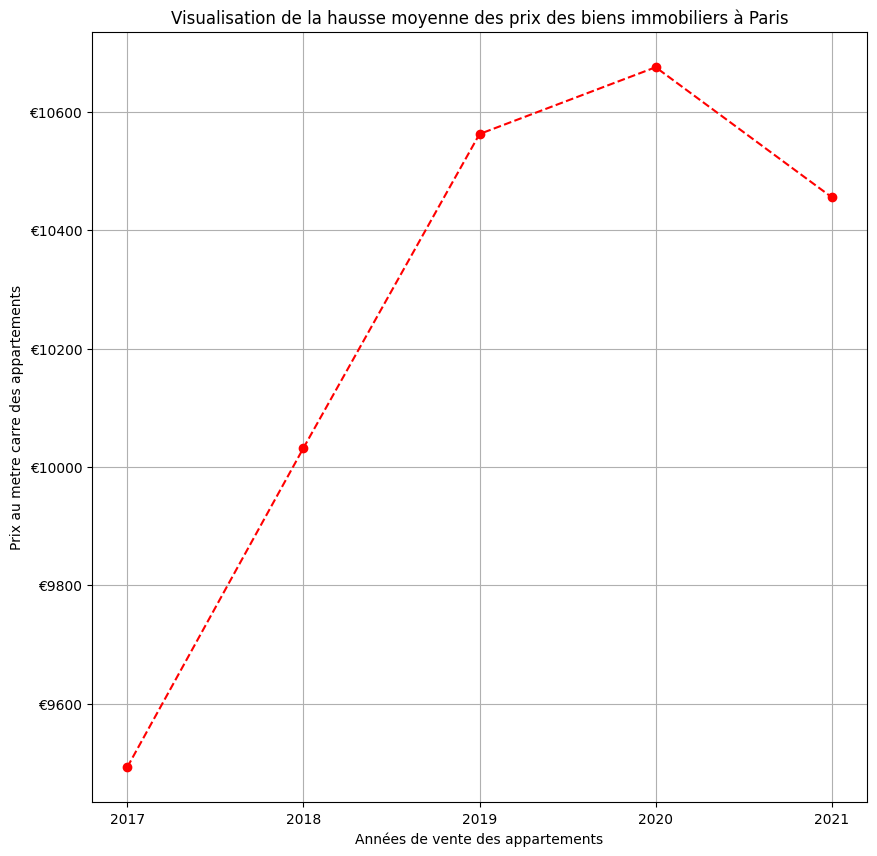

In [23]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix

df_graph_data = df_graph(df_immo_moyen,non_num_cols,'annee_mutation')
plt.figure(figsize=(10,10))
plt.plot(['2017', '2018','2019','2020','2021'],df_graph_data['Prix_au_m2'],
         marker='o', linestyle='--', color='red')
plt.xlabel('Années de vente des appartements')
plt.ylabel('Prix au metre carre des appartements')

formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Visualisation de la hausse moyenne des prix des biens immobiliers à Paris')
plt.savefig('hausse_moy_prix.png')
plt.show()

### 6. Différences de prix au metre carré entre les arrondissements

Maintenant nous allons chercher à afficher l'évolution des prix par arrondissement. Vérifions la liste des arrondissements que nous avons dans nos données. Normalement à Paris nous avons 20 codes postaux différents, 1 par arrondissement allant de 75001 à 75020.

In [24]:
#Liste des codes postaux dans nos données.
df_immo_cp = df_immo['code_postal'].unique()
df_immo_cp.sort()
print('Nombre d\'arrondissements présents dans les données:')
print(len(df_immo_cp))
print('Tableau des arrondissements présents dans les données:')
df_immo_cp


Nombre d'arrondissements présents dans les données:
20
Tableau des arrondissements présents dans les données:


array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009,
       75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018,
       75019, 75020], dtype=uint32)

In [25]:
#Créons un dataframe pour une deuxième visualisation avec l'évolution des prix par arrondissement
# création du dataframe avec les aggrégats par code_postal:
non_arr_cols = ['date_mutation','type_local']
df_immo_moyen_75001 = df_immo_moyen.loc[df_immo_moyen['code_postal'] == 75001,:].copy()
print("Dataframe en regroupant les prix moyens de ventes des appartements pour"+
       "le 1er arrondissement avec la surface moyenne associée:")
df_graph(df_immo_moyen_75001,non_arr_cols,'annee_mutation')


Dataframe en regroupant les prix moyens de ventes des appartements pourle 1er arrondissement avec la surface moyenne associée:


,valeur_fonciere,code_postal,code_type_local,surface_reelle,Prix_au_m2
annee_mutation,,,,,
2017,530392.438,75001.000,2.000,45.241,11762.706
2018,581390.375,75001.000,2.000,46.010,12621.226
2019,454606.250,75001.000,2.000,34.308,13269.256
2020,601204.938,75001.000,2.000,44.871,13405.992
2021,639321.062,75001.000,2.000,47.778,13379.499


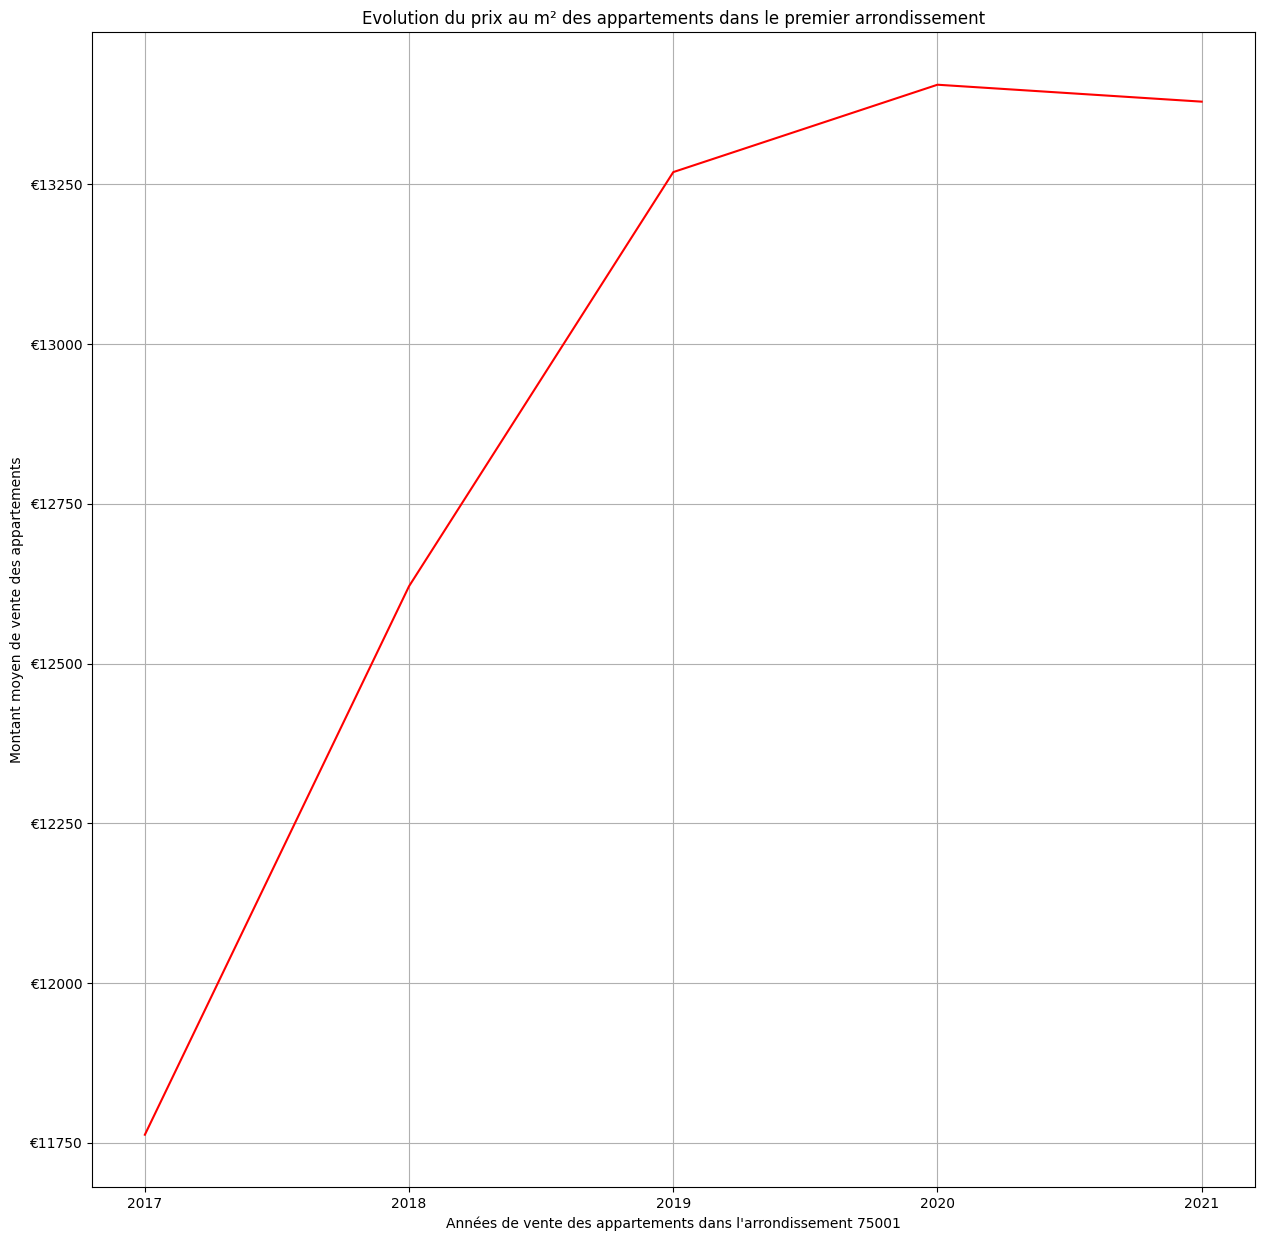

In [26]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix au metre carré dans le premier arrondissement
df_graph_data_arr1 = df_graph(df_immo_moyen_75001,non_arr_cols,'annee_mutation')
plt.figure(figsize=(15,15))
plt.plot(['2017','2018','2019','2020','2021'],df_graph_data_arr1['Prix_au_m2'],color='red')
plt.xlabel('Années de vente des appartements dans l\'arrondissement 75001')
plt.ylabel('Montant moyen de vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution du prix au m² des appartements dans le premier arrondissement')
plt.show()

Nous allons ajouter à cette visualisation tous les autres arrondissements avec une couleur différente.

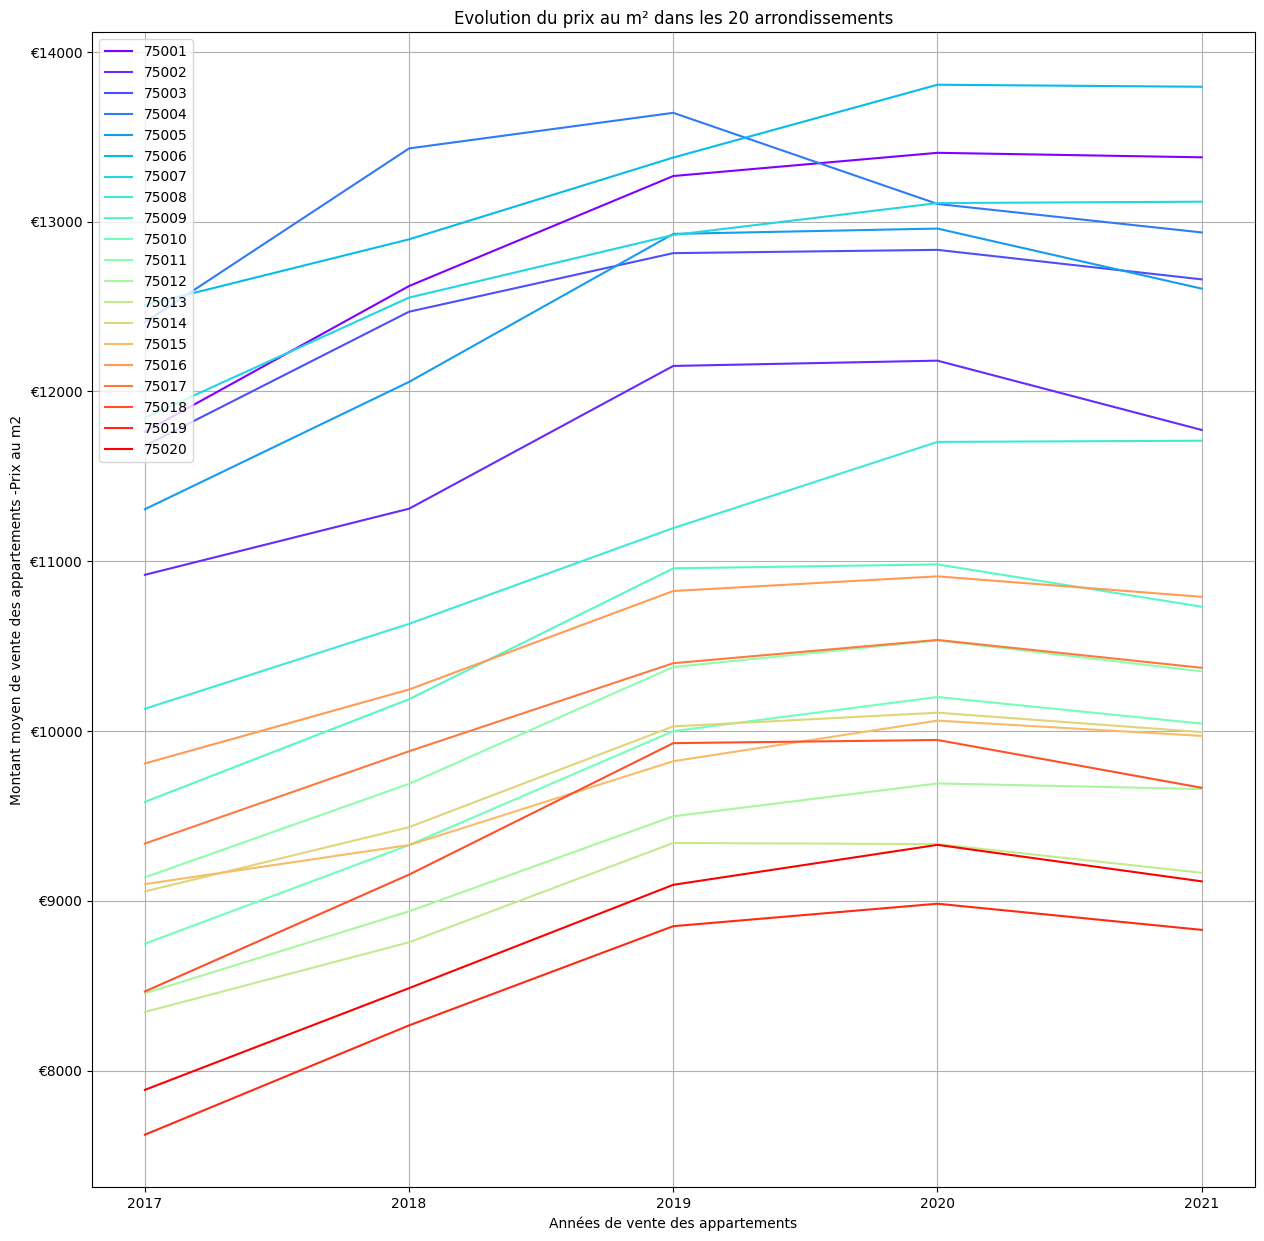

In [27]:
#On affiche l'évolution du prix au m² par arrondissement dans Paris
plt.figure(figsize=(15,15))
interval_historique=['2017','2018','2019','2020','2021']
#Insérer les lignes à tracer ci-dessous
#couleurs:
color = iter(cm.rainbow(np.linspace(0, 1, len(df_immo_cp))))
#données:
for i in df_immo_cp:
    df_name = 'df_immo_moyen_' + str(i)
    df_name = df_immo_moyen.loc[df_immo_moyen['code_postal'] == i,:].copy()
    graph_data_name = 'df_graph_data_' + str(i)
    graph_data_name = df_graph(df_name,[non_arr_cols],'annee_mutation')
    c = next(color)
    plt.plot(['2017','2018','2019','2020','2021'],graph_data_name['Prix_au_m2'],
             color=c,label=i)

plt.xlabel('Années de vente des appartements')
plt.ylabel('Montant moyen de vente des appartements -Prix au m2')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution du prix au m² dans les 20 arrondissements')
plt.legend(loc='upper left')
plt.savefig('evolution_prix_arrondissmts.png')
plt.show()

On observe que globalement que le prix au m2 des appartements vendus, en croissance depuis 2017, se tasse, voire décroît à partir de 2020. Egalement, on remarque que le prix au m2 des arrondissements périphériques (seconde moitié de la liste des codes postaux) est moins élevé que celui des arrondissements centraux. 

### 7. Prix au metre carré par transaction dans un arrondissement

In [28]:
#Vérifions le nombre de transaction dans le 6ème car le prix semble élevé
print('Nombre de transactions étudiées pour le 6ème arrondissement:')
df_immo_moyen.loc[df_immo_moyen['code_postal'] == 75006,:].valeur_fonciere.shape[0]

Nombre de transactions étudiées pour le 6ème arrondissement:


709

In [29]:
print('On constate qu\'il y a {} transactions répertoriées dans les données'.format(
    df_immo_moyen.loc[df_immo_moyen['code_postal'] == 75006,:].valeur_fonciere.shape[0]))

On constate qu'il y a 709 transactions répertoriées dans les données


Affichons l'historique des transactions pour visualiser la dispersion des données :

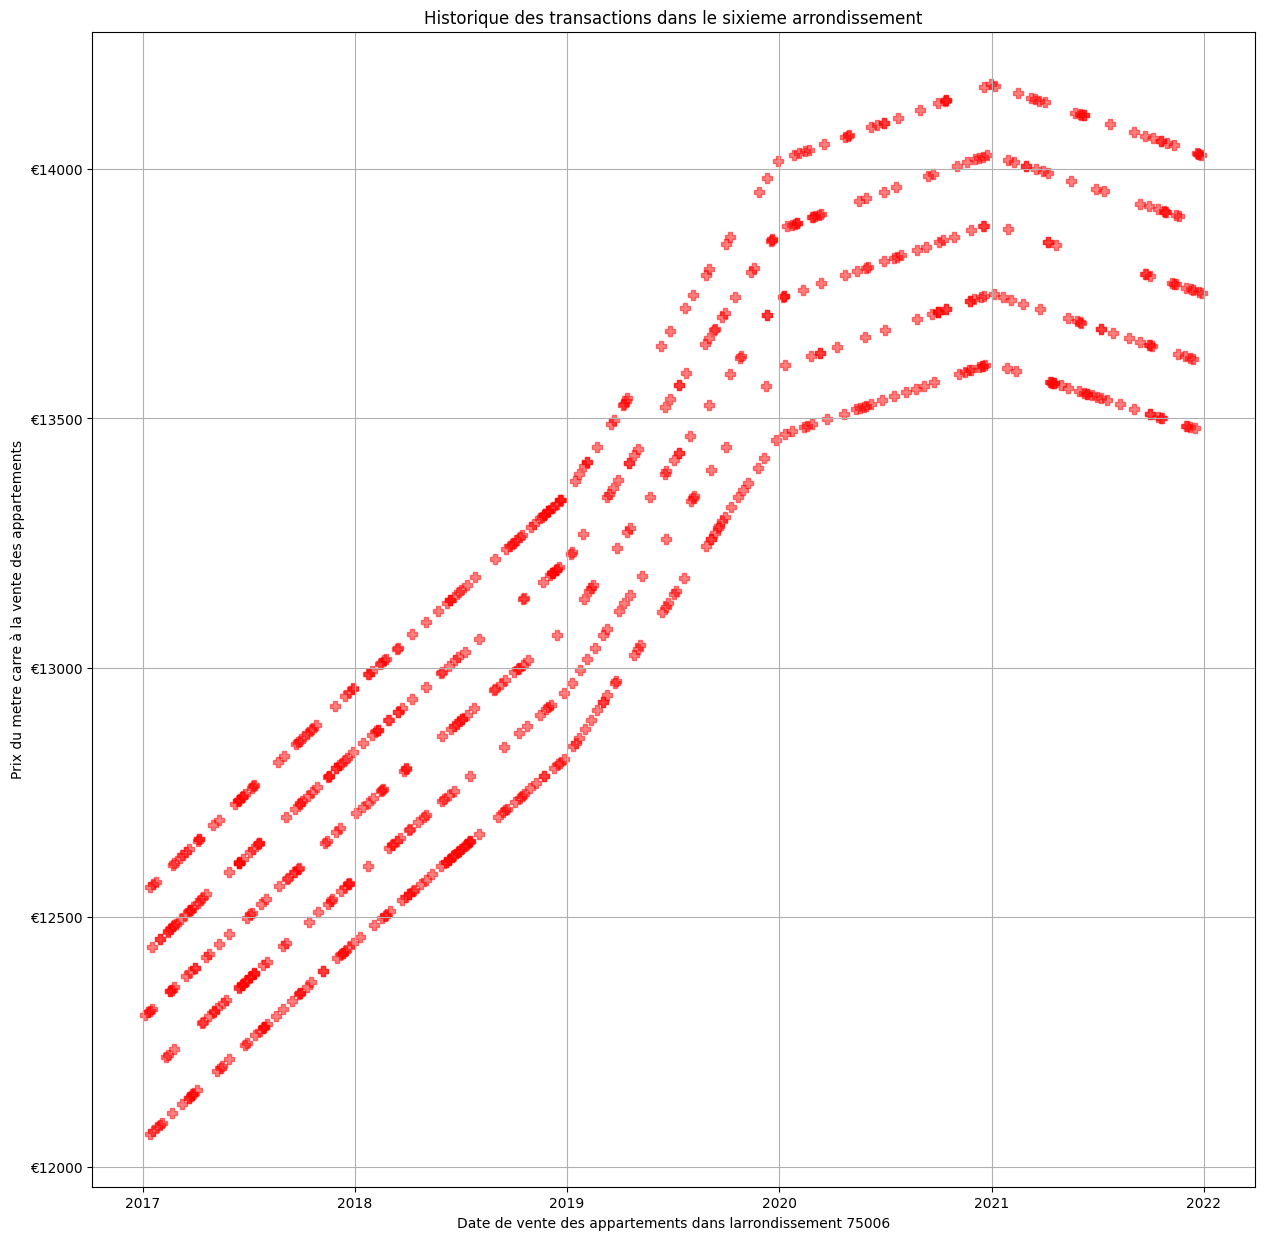

In [30]:
cp=75006 # code postal de l'arrondissement étudié
plt.figure(figsize=(15,15))
#Insérer ci-dessous le scatter plot

plt.xlabel('Date de vente des appartements dans larrondissement 75006')
plt.ylabel('Prix du metre carre à la vente des appartements')
plt.scatter(df_immo_moyen.loc[df_immo_moyen['code_postal'] == cp,:].date_mutation, 
            df_immo_moyen.loc[df_immo_moyen['code_postal'] == cp,:].Prix_au_m2,
    s=60, alpha=0.5, c='red', marker='P')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(which='both')
plt.title('Historique des transactions dans le sixieme arrondissement')
plt.show()

On observe que les données sont réparties sur 5 courbes qui semblent suivre la même tendance au fil du temps, principalement de régression linéaire.

Pour nous rassurer sur la relation entre les données nous allons utiliser un test statistique de corrélation.

### 8. Vérification de la relation entre le prix au m² et la date dans le 6ème arrondissement par le calcul du coefficient de corrélation de Pearson 

Pour cette distribution nous allons calculer le coefficient de corrélation de Pearson. La relation entre le prix au metre carré et la date n'est pas forcément linéaire mais elle s'en rapproche suffisamment pour que cette analyse soit pertinente (voir l'évolution du prix au metre carré globale montrée plus haut, on a presque une droite sauf entre 2020 et 2021). Ce qui nous interesse c'est de prouver que le temps a une influence sur le prix.

In [31]:
# on fait le test Shapiro-Wilk pour évaluer la normalité des données des prix au m2 dans le 6e arrondissement
res = stats.shapiro(df_immo_moyen.loc[df_immo_moyen['code_postal'] == cp,:]['Prix_au_m2'])
res.statistic

0.9547011852264404

La distribution des données des prix au m2 est normale.

In [32]:
#On calcule la corrélation de Spearman

date_et_prix = ['date_mutation','Prix_au_m2']
scipy.stats.spearmanr(a=df_immo_moyen.loc[df_immo_moyen['code_postal'] == cp,:][date_et_prix], 
                      b=None,
                      axis=0, nan_policy='propagate', alternative='two-sided')

SignificanceResult(statistic=0.9148452468437352, pvalue=1.198699476673947e-280)

In [33]:
spearmanr = scipy.stats.spearmanr(a=df_immo_moyen.loc[df_immo_moyen['code_postal'] == cp,:][date_et_prix], 
                      b=None,
                      axis=0, nan_policy='propagate', alternative='two-sided')

# pvalue: calcul grossier de la probabilité d'un système non corrélé produisant des datasets qui ont 1 corrélation Spearman
# au moins aussi forte que celle calculé par le dataset utilisé:
print('Le coefficient de corrélation Spearman est de {:.2f} '.format(spearmanr[0]) + 
      'avec une pvalue de {:.2f} (pour un nombre de données > 500) donc nous pouvons confirmer la corrélation.'.format(spearmanr[1]))

Le coefficient de corrélation Spearman est de 0.91 avec une pvalue de 0.00 (pour un nombre de données > 500) donc nous pouvons confirmer la corrélation.


In [34]:
df_immo_moyen.loc[df_immo_moyen['code_postal'] == cp,:].Prix_au_m2.info()

<class 'pandas.core.series.Series'>
Index: 709 entries, 493 to 25020
Series name: Prix_au_m2
Non-Null Count  Dtype  
--------------  -----  
709 non-null    float32
dtypes: float32(1)
memory usage: 8.3 KB


In [35]:
#On calcule la corrélation de Pearson

df_immo_moyen.loc[df_immo_moyen['code_postal'] == cp,:][date_et_prix].corr(
    method='pearson', min_periods=1, numeric_only=False)


,date_mutation,Prix_au_m2
date_mutation,1.000,0.904
Prix_au_m2,0.904,1.000


In [36]:
pearsonr = df_immo_moyen.loc[df_immo_moyen['code_postal'] == cp,:][date_et_prix].corr(
    method='pearson', min_periods=1, numeric_only=False)
print('Le coefficient de corrélation Pearson est de {:.3f} '.format(pearsonr.date_mutation[1]) + 
      'et semble aussi confirmer la corrélation.')


Le coefficient de corrélation Pearson est de 0.904 et semble aussi confirmer la corrélation.


### 9. Vérification de la relation entre la valeur foncière et la surface

In [37]:
#On calcule la corrélation de Spearman entre valeur foncière et surface réelle
valeur_et_surface = ['valeur_fonciere','surface_reelle']
scipy.stats.spearmanr(a=df_immo_moyen.loc[df_immo_moyen['code_postal'] == cp,:][valeur_et_surface], 
                      b=None,
                      axis=0, nan_policy='propagate', alternative='two-sided')

SignificanceResult(statistic=0.9977685406899678, pvalue=0.0)

In [38]:
spearmanr_surface6 = scipy.stats.spearmanr(a=df_immo_moyen.loc[df_immo_moyen['code_postal'] == cp,:][valeur_et_surface], 
                      b=None,
                      axis=0, nan_policy='propagate', alternative='two-sided')
print('Le coefficient de corrélation très fort pour le 6e arrondissement est de {:.3f}'.format(spearmanr_surface6[0])
      + ' avec une pvalue de {:.3f}. La relation est donc confirmée.'.format(spearmanr_surface6[1]))

Le coefficient de corrélation très fort pour le 6e arrondissement est de 0.998 avec une pvalue de 0.000. La relation est donc confirmée.


In [39]:
spearmanr_surface = scipy.stats.spearmanr(a=df_immo_moyen[valeur_et_surface], 
                      b=None,
                      axis=0, nan_policy='propagate', alternative='two-sided')
print('Le coefficient de corrélation spearman prix-surface, tous arrondissements confondus, est de {:.3f}'.format(spearmanr_surface[0])
      + ' avec une pvalue de {:.3f}. La relation est donc confirmée.'.format(spearmanr_surface[1]))

Le coefficient de corrélation spearman prix-surface, tous arrondissements confondus, est de 0.977 avec une pvalue de 0.000. La relation est donc confirmée.


### Vérification de la relation entre le prix au m2 et la surface

In [40]:
prix_au_m2_et_surface = ['Prix_au_m2','surface_reelle']
scipy.stats.spearmanr(a=df_immo_moyen[prix_au_m2_et_surface], 
                      b=None,
                      axis=0, nan_policy='propagate', alternative='two-sided')

SignificanceResult(statistic=0.06464247275251937, pvalue=5.8444027738625896e-24)

In [41]:
spearmanr_prix_m2_surface = scipy.stats.spearmanr(a=df_immo_moyen[prix_au_m2_et_surface], 
                      b=None,
                      axis=0, nan_policy='propagate', alternative='two-sided')
print('Le coefficient de corrélation spearman prix au m2-surface, tous arrondissements confondus, est de {:.3f}'.format(spearmanr_prix_m2_surface[0])
      + ' avec une pvalue de {:.3f}. La surface du bien vendu ne semble que peu jouer sur le prix au m2 des biens.'.format(spearmanr_prix_m2_surface[1]))

Le coefficient de corrélation spearman prix au m2-surface, tous arrondissements confondus, est de 0.065 avec une pvalue de 0.000. La surface du bien vendu ne semble que peu jouer sur le prix au m2 des biens.


Regardons maintenant si le type de bien a une influence sur le prix au mètre carré également.

### 10. Analyse des locaux industriels, commerciaux et assimilés 

In [42]:
#On crée un dataframe qui ne contient que les locaux commerciaux
df_immo_local = df_immo.loc[df_immo['code_type_local'] == 4,:].copy()
df_immo_local.head()

,date_mutation,valeur_fonciere,code_postal,code_type_local,type_local,surface_reelle,Prix_au_m2,annee_mutation
2761,2017-01-03,131779.562,75015,4,Local industriel. commercial ou assimilé,13.000,10136.890,2017
2472,2017-01-04,1480228.875,75014,4,Local industriel. commercial ou assimilé,146.000,10138.554,2017
1084,2017-01-09,461568.000,75009,4,Local industriel. commercial ou assimilé,45.000,10257.066,2017
1085,2017-01-11,612676.750,75010,4,Local industriel. commercial ou assimilé,65.000,9425.796,2017
2802,2017-01-12,411410.656,75015,4,Local industriel. commercial ou assimilé,41.000,10034.406,2017


In [43]:
#Préparons un dataframe en regroupant les prix au metre carré moyens des ventes par année
df_graph(df_immo_local,non_num_cols,'annee_mutation')

,valeur_fonciere,code_type_local,surface_reelle,Prix_au_m2
annee_mutation,,,,
2017,967524.875,4.000,90.193,10944.070
2018,1003463.188,4.000,88.094,11569.509
2019,992822.125,4.000,82.826,11960.132
2020,1034380.500,4.000,85.631,11966.471
2021,1129357.125,4.000,92.832,12006.489


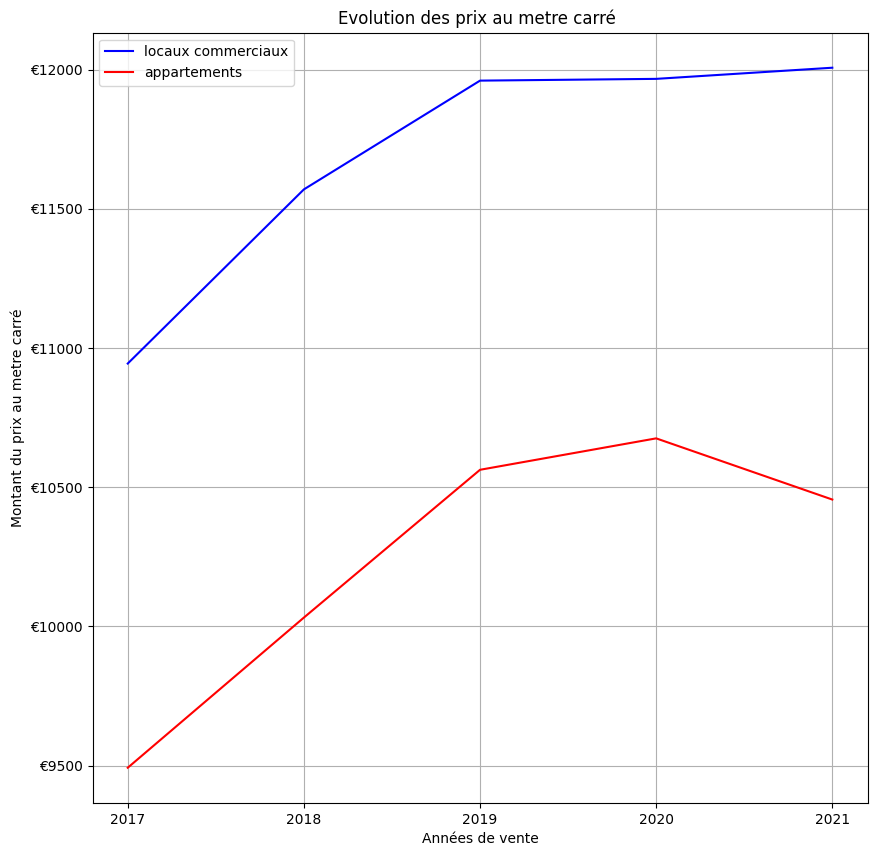

In [44]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
df_graph_data_local = df_graph(df_immo_local,non_num_cols,'annee_mutation')
plt.figure(figsize=(10,10))
plt.plot(['2017','2018','2019','2020','2021'],df_graph_data_local['Prix_au_m2'],label='locaux commerciaux',color='blue')
plt.plot(['2017','2018','2019','2020','2021'],df_graph_data['Prix_au_m2'],label='appartements',color='red')
plt.xlabel('Années de vente')
plt.ylabel('Montant du prix au metre carré')
plt.legend()
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution des prix au metre carré ')
plt.savefig('evolution_prix_type_local.png')
plt.show()

Le prix au mètre carré des locaux commerciaux est globalement supérieur au prix au mètre carré des appartements.

Après ces analyses, nous pouvons conclure que les dimensions à utiliser pour prédire le prix de l'appartement sont : 
- la surface du bien immobilier,
- la date considérée, 
- la localisation (code_postal), 
- le type de bien.

# Milestone 2 - Entraînement de l'algorithme

Dans cette section nous allons maintenant entrainer un algorithme à prédire la valeur fonciere d'un bien immobilier. Pour cela nous allons utiliser l'algorithme de régression linéaire.

On commence par préparer nos données en transformant les colonnes catégoriques du code postal et du type de local grâce au one hot encoder (sklearn) / get_dummies (pandas)

In [45]:
df_immo.head()

,date_mutation,valeur_fonciere,code_postal,code_type_local,type_local,surface_reelle,Prix_au_m2,annee_mutation
2765,2017-01-02,1161155.500,75015,2,Appartement,126.000,9215.520,2017
3291,2017-01-02,407992.281,75016,2,Appartement,43.000,9488.192,2017
0,2017-01-03,550559.688,75003,2,Appartement,50.000,11011.193,2017
1579,2017-01-03,716635.500,75011,2,Appartement,80.000,8957.943,2017
1580,2017-01-03,731040.250,75011,2,Appartement,80.000,9138.003,2017


In [46]:
# ajoût d'une colonne 'days_since_start' pour numériser les dates et les traiter en paramètre 
# dans le modèle de regression linéaire:
df_immo['days_since_start'] = (df_immo['date_mutation'] - df_immo['date_mutation'].min()).dt.days
df_immo.head()

,date_mutation,valeur_fonciere,code_postal,code_type_local,type_local,surface_reelle,Prix_au_m2,annee_mutation,days_since_start
2765,2017-01-02,1161155.500,75015,2,Appartement,126.000,9215.520,2017,0
3291,2017-01-02,407992.281,75016,2,Appartement,43.000,9488.192,2017,0
0,2017-01-03,550559.688,75003,2,Appartement,50.000,11011.193,2017,1
1579,2017-01-03,716635.500,75011,2,Appartement,80.000,8957.943,2017,1
1580,2017-01-03,731040.250,75011,2,Appartement,80.000,9138.003,2017,1


In [47]:
df_immo.tail()

,date_mutation,valeur_fonciere,code_postal,code_type_local,type_local,surface_reelle,Prix_au_m2,annee_mutation,days_since_start
23419,2021-12-30,435537.812,75018,2,Appartement,45.000,9678.618,2021,1823
23386,2021-12-30,170748.156,75018,2,Appartement,18.000,9486.009,2021,1823
23454,2021-12-31,408204.719,75017,4,Local industriel. commercial ou assimilé,36.000,11339.020,2021,1824
25003,2021-12-31,769860.000,75007,2,Appartement,60.000,12831.000,2021,1824
24992,2021-12-31,458400.594,75016,2,Appartement,42.000,10914.300,2021,1824


In [48]:
# Définissons les colonnes numériques et les colonnes catégorielles
# que nous allons utiliser pour entraîner notre modèle:

numerical_columns = ['days_since_start']
categorical_columns = ['code_postal','type_local']

In [49]:
# Now, we create our ColumnTransfomer by specifying three values: the preprocessor name, the transformer, 
# and the columns. 

In [50]:
# First, let’s create the preprocessors for the numerical and categorical parts.
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
# numerical_preprocessor = StandardScaler(); remarque la mise à l'échelle avec StandardScaler ou MinMaxScaler
# donne le même score pour les données utilisées ici
numerical_preprocessor = MinMaxScaler()

In [51]:
# Now, we create the transformer and associate each of these preprocessors with their respective columns.
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    [
        ("one-hot-encoder", categorical_preprocessor, categorical_columns),
        # ou bien : ("standard_scaler", numerical_preprocessor, numerical_columns),
        ("minmax_scaler", numerical_preprocessor, numerical_columns),
    ]
)

In [52]:
y = df_immo['Prix_au_m2']

features = df_immo[['code_postal','type_local','days_since_start']]

In [53]:
type(features)

pandas.core.frame.DataFrame

In [54]:
# determine catégories peu fréquentes
ohe = OneHotEncoder(max_categories=3, sparse_output=False).fit(features)
ohe.infrequent_categories_

[array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009,
        75010, 75011, 75012, 75013, 75014, 75016, 75017, 75019, 75020],
       dtype=uint32),
 None,
 array([   0,    1,    2, ..., 1822, 1823, 1824], dtype=int64)]

On utilise le train_test_split pour prélever un tiers de nos données (33%) et les garder de côté. Nous allons entraîner notre algorithme sur le reste des données et puis mesurer notre erreur moyenne en pourcentage de la valeur foncière

In [55]:
from sklearn.model_selection import train_test_split
features_train, features_test, y_train, y_test = train_test_split(
features, y, test_size=0.33, random_state=42)
features_train, features_test, y_train, y_test

(       code_postal   type_local  days_since_start
 9372         75017  Appartement               567
 8572         75015  Appartement               687
 14702        75017  Appartement               793
 16288        75019  Appartement              1025
 18948        75015  Appartement              1317
 ...            ...          ...               ...
 25072        75010  Appartement              1502
 2280         75011  Appartement               353
 3341         75016  Appartement                57
 12382        75009  Appartement              1039
 23970        75015  Appartement              1648
 
 [17539 rows x 3 columns],
        code_postal   type_local  days_since_start
 1806         75012  Appartement               130
 19933        75018  Appartement              1166
 6077         75007  Appartement               394
 2526         75014  Appartement                73
 7221         75012  Appartement               479
 ...            ...          ...               ...
 1

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
#On entraîne l'algorithme ci-dessous et on effectue la prédiction
#instancier modèle
model_linRegMul = make_pipeline(preprocessor, LinearRegression())

In [57]:
#entrainement du modèle
model_linRegMul.fit(features_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['code_postal',
                                                   'type_local']),
                                                 ('minmax_scaler',
                                                  MinMaxScaler(),
                                                  ['days_since_start'])])),
                ('linearregression', LinearRegression())])

In [58]:
# nom des colonnes créees par l'encoder et le scaler:
model_linRegMul[:-1].get_feature_names_out()

array(['one-hot-encoder__code_postal_75001',
       'one-hot-encoder__code_postal_75002',
       'one-hot-encoder__code_postal_75003',
       'one-hot-encoder__code_postal_75004',
       'one-hot-encoder__code_postal_75005',
       'one-hot-encoder__code_postal_75006',
       'one-hot-encoder__code_postal_75007',
       'one-hot-encoder__code_postal_75008',
       'one-hot-encoder__code_postal_75009',
       'one-hot-encoder__code_postal_75010',
       'one-hot-encoder__code_postal_75011',
       'one-hot-encoder__code_postal_75012',
       'one-hot-encoder__code_postal_75013',
       'one-hot-encoder__code_postal_75014',
       'one-hot-encoder__code_postal_75015',
       'one-hot-encoder__code_postal_75016',
       'one-hot-encoder__code_postal_75017',
       'one-hot-encoder__code_postal_75018',
       'one-hot-encoder__code_postal_75019',
       'one-hot-encoder__code_postal_75020',
       'one-hot-encoder__type_local_Appartement',
       'one-hot-encoder__type_local_Local industri

In [59]:
#précision du modèle sur les données train
precision = model_linRegMul.score(features_train, y_train)
print("Précision du modèle sur les données train: {:.2f}".format(precision*100),"%")

Précision du modèle sur les données train: 94.56 %


In [60]:
prediction = model_linRegMul.predict(features_test)
print("Prédiction des features_test -Prix au m2 en fonction du CP et du type de local:", prediction)

Prédiction des features_test -Prix au m2 en fonction du CP et du type de local: [ 8594.99616008  9632.83821394 12315.93774417 ... 10341.16382108
  9734.22584872 10541.13720104]


In [61]:
#précision du modèle sur les données test
precision = model_linRegMul.score(features_test, y_test)
print("Précision du modèle sur les données test: {:.2f}".format(precision*100),"%")

Précision du modèle sur les données test: 94.76 %


In [62]:
prediction.shape

(8640,)

In [63]:
print('Notre algorithme fait donc {:.3f} % d'.format((1-precision)*100) + '\'erreur en moyenne sur la prédiction de la valeur foncière.')
print('Mes conclusions sur ce résultat et comment j\'aurais pu aller plus loin :')


Notre algorithme fait donc 5.235 % d'erreur en moyenne sur la prédiction de la valeur foncière.
Mes conclusions sur ce résultat et comment j'aurais pu aller plus loin :


- Les prédictions du modèle sont imprécises à hauteur de 5% environ.
- on pourrait aller plus loin en utilisant la validation croisée, par le biais de différents découpages de notre jeu de données pour entraîner encore plus le modèle
- il faudrait également idéalement tenir compte de la sous-représentation des données de ventes de Locaux Industriels ou commerciaux, et du nombre de ventes qui diffèrent selon les années (voir tableau ci-dessous):

In [64]:
# fonction création d'un dataframe pour représentation graphique:
def df_graph2(df,cols_to_drop,col_aggregate):    
    # colonnes non numériques à supprimer pour calculer le nombre des agrégats:
    for j in cols_to_drop:
        df = df.drop(columns=j)
    return df.groupby(col_aggregate).count()

# création du dataframe avec les aggrégats par année:
cols_to_drop_2 = ['date_mutation','code_postal','Prix_au_m2','valeur_fonciere','surface_reelle','days_since_start']
group_by_cols = ['annee_mutation','type_local']
print("Dataframe faisant le compte des ventes immobilières:")
df_graph2(df_immo,cols_to_drop_2,group_by_cols)

Dataframe faisant le compte des ventes immobilières:


code_type_local
annee_mutation type_local                                               
2017           Appartement                                          5201
               Local industriel. commercial ou assimilé              348
2018           Appartement                                          5075
               Local industriel. commercial ou assimilé              351
2019           Appartement                                          5245
               Local industriel. commercial ou assimilé              432
2020           Appartement                                          4123
               Local industriel. commercial ou assimilé              336
2021           Appartement                                          4693
               Local industriel. commercial ou assimilé              375

# Milestone 3 - Prédiction définitive pour le client 

Nous avons récupéré le fichier avec le portefeuille des actifs de la société. Nous allons l'importer puis effectuer la prédiction et statuer sur la branche qui, selon notre prédiction, aura le plus de valeur à la date demandée c'est à dire au 31 décembre 2022.<br>
Petite précision, nous souhaitons continuer à utiliser la surface réelle pour faire les calculs et pas la surface carrez. 

In [65]:
#On importe les données dans un dataframe
df_portfolio = pd.read_excel("portefeuille_actifs+(3).xlsx")
df_portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   adresse_numero             275 non-null    int64  
 1   adresse_nom_voie           275 non-null    object 
 2   code_postal                275 non-null    int64  
 3   code_commune               275 non-null    int64  
 4   nom_commune                275 non-null    object 
 5   surface_carrez             275 non-null    float64
 6   code_type_local            275 non-null    int64  
 7   type_local                 275 non-null    object 
 8   surface_reelle_bati        275 non-null    int64  
 9   nombre_pieces_principales  275 non-null    int64  
 10  longitude                  275 non-null    float64
 11  latitude                   275 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 25.9+ KB


In [66]:
# Recherche des doublons
transacs_portfolio = ['adresse_numero','code_postal','adresse_nom_voie','nom_commune','nombre_pieces_principales','surface_carrez']
df_portfolio.loc[df_portfolio[transacs_portfolio].duplicated(keep=False),:]


,adresse_numero,adresse_nom_voie,code_postal,code_commune,nom_commune,surface_carrez,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude
166,3,RUE DAMREMONT,75018,75118,Paris 18e Arrondissement,26.860,4,Local industriel. commercial ou assimilé,27,0,2.332,48.887
185,3,RUE DAMREMONT,75018,75118,Paris 18e Arrondissement,26.860,4,Local industriel. commercial ou assimilé,27,0,2.332,48.887
249,104,BD VOLTAIRE,75011,75111,Paris 11e Arrondissement,38.500,4,Local industriel. commercial ou assimilé,42,0,2.377,48.859
250,104,BD VOLTAIRE,75011,75111,Paris 11e Arrondissement,38.500,4,Local industriel. commercial ou assimilé,42,0,2.377,48.859


il n'y que 2 appartements qui paraissent être en double dans le portefeuille, nous allons les garder sans analyse
plus poussée car ils ne devraient pas trop fausser la valorisation du portefeuille, vu la surface des appartements.

In [67]:
# suppression des colonnes inutiles pour la valorisation:
cols_to_drop_portfolio = ['longitude','latitude','nombre_pieces_principales','surface_carrez', 
                          'code_commune','nom_commune','adresse_numero','adresse_nom_voie']
for j in cols_to_drop_portfolio:
        df_portfolio = df_portfolio.drop(columns = j)
df_portfolio.head()

,code_postal,code_type_local,type_local,surface_reelle_bati
0,75001,2,Appartement,25
1,75003,2,Appartement,22
2,75003,2,Appartement,65
3,75008,2,Appartement,74
4,75008,2,Appartement,22


In [68]:
# on modifie les types des données du portefeuille pour avoir le même type que dans le modèle:
df_portfolio = df_portfolio.astype({'surface_reelle_bati': np.float16, 
                          'code_postal':np.uint32, 'code_type_local':np.uint8}, copy=False)
df_portfolio.dtypes

code_postal             uint32
code_type_local          uint8
type_local              object
surface_reelle_bati    float16
dtype: object

In [69]:
# on renomme la colonne 'surface_reelle_bati' en surface_reelle' comme dans le modèle
df_portfolio = df_portfolio.rename(columns={'surface_reelle_bati': 'surface_reelle'})
df_portfolio.head()

,code_postal,code_type_local,type_local,surface_reelle
0,75001,2,Appartement,25.000
1,75003,2,Appartement,22.000
2,75003,2,Appartement,65.000
3,75008,2,Appartement,74.000
4,75008,2,Appartement,22.000


In [70]:
# on rajoute une colonne 'date_mutation' contenant les valeurs 2022-12-31:
import datetime as dt
df_portfolio['date_mutation'] = dt.datetime(2022, 12, 31)
# on rajoute une colonne 'days_since_start' comme dans le modèle, 
# avec la même date de départ que dans le modèle:
df_portfolio['days_since_start'] = (df_portfolio['date_mutation'] - df_immo['date_mutation'].min()).dt.days
df_portfolio.head()

,code_postal,code_type_local,type_local,surface_reelle,date_mutation,days_since_start
0,75001,2,Appartement,25.000,2022-12-31,2189
1,75003,2,Appartement,22.000,2022-12-31,2189
2,75003,2,Appartement,65.000,2022-12-31,2189
3,75008,2,Appartement,74.000,2022-12-31,2189
4,75008,2,Appartement,22.000,2022-12-31,2189


In [71]:
# on regarde les codes postaux représentés dans le portefeuille:
df_portfolio.code_postal.unique()

array([75001, 75003, 75008, 75010, 75017, 75018, 75020, 75019, 75002,
       75009, 75014, 75005, 75012, 75011, 75015, 75007, 75006, 75016,
       75013, 75004], dtype=uint32)

In [72]:
print("Nombre d'arrondissements représentés dans le portefeuille:",len(df_portfolio.code_postal.unique()))

Nombre d'arrondissements représentés dans le portefeuille: 20


In [73]:
# on regarde le nombre d'appartements et de locaux industriels présents dans le portefeuille:
df_portfolio['type_local'].value_counts()

type_local
Appartement                                 154
Local industriel. commercial ou assimilé    121
Name: count, dtype: int64

In [74]:
df_portfolio.tail()

,code_postal,code_type_local,type_local,surface_reelle,date_mutation,days_since_start
270,75019,4,Local industriel. commercial ou assimilé,16.000,2022-12-31,2189
271,75002,4,Local industriel. commercial ou assimilé,15.000,2022-12-31,2189
272,75002,4,Local industriel. commercial ou assimilé,35.000,2022-12-31,2189
273,75002,4,Local industriel. commercial ou assimilé,49.000,2022-12-31,2189
274,75004,4,Local industriel. commercial ou assimilé,37.000,2022-12-31,2189


Nous avons la liste des biens immobiliers de l'entreprise. Pour effectuer une prédiction, nous avons mis ce fichier au même format que le dataframe que nous avons utilisé lors de l'entraînement de l'algorithme.

In [75]:
portfolio_features = df_portfolio[['code_postal','type_local','days_since_start']]

Notre dataframe est prêt à être utilisé par notre algorithme de prédiction.

In [76]:
#On effectue la prédiction
prediction = model_linRegMul.predict(portfolio_features)
#On vérifie les 10 premières valeurs
print('Prédiction du Prix au m2 des 10 premiers éléments du portefeuille immobilier:')
prediction[:10]

Prédiction du Prix au m2 des 10 premiers éléments du portefeuille immobilier:


array([13976.94177537, 13562.73807367, 13562.73807367, 12069.84843877,
       12069.84843877, 12069.84843877, 13562.73807367, 10671.8516078 ,
       11118.4684856 , 10459.43142787])

Maintenant nous allons comparer la valorisation prédite pour les deux segments.

In [106]:
# on ajoûte une colonne avec les dLinearRegressiononnées de la prédiction au df_portfolio:
df_portfolio['Prix_au_m2'] = prediction
df_portfolio.head(10)

,code_postal,code_type_local,type_local,surface_reelle,date_mutation,days_since_start,Prix_au_m2,valeur_de_vente
0,75001,2,Appartement,25.000,2022-12-31,2189,13976.942,349423.544
1,75003,2,Appartement,22.000,2022-12-31,2189,13562.738,298380.238
2,75003,2,Appartement,65.000,2022-12-31,2189,13562.738,881577.975
3,75008,2,Appartement,74.000,2022-12-31,2189,12069.848,893168.784
4,75008,2,Appartement,22.000,2022-12-31,2189,12069.848,265536.666
5,75008,2,Appartement,35.000,2022-12-31,2189,12069.848,422444.695
6,75003,2,Appartement,24.000,2022-12-31,2189,13562.738,325505.714
7,75010,2,Appartement,60.000,2022-12-31,2189,10671.852,640311.096
8,75017,2,Appartement,11.000,2022-12-31,2189,11118.468,122303.153
9,75018,2,Appartement,13.000,2022-12-31,2189,10459.431,135972.609


In [78]:
# on ajoûte une colonne pour calculer une estimation de la valeur de vente:
df_portfolio['valeur_de_vente'] = df_portfolio['surface_reelle'] * df_portfolio['Prix_au_m2']
df_portfolio.head()

,code_postal,code_type_local,type_local,surface_reelle,date_mutation,days_since_start,Prix_au_m2,valeur_de_vente
0,75001,2,Appartement,25.000,2022-12-31,2189,13976.942,349423.544
1,75003,2,Appartement,22.000,2022-12-31,2189,13562.738,298380.238
2,75003,2,Appartement,65.000,2022-12-31,2189,13562.738,881577.975
3,75008,2,Appartement,74.000,2022-12-31,2189,12069.848,893168.784
4,75008,2,Appartement,22.000,2022-12-31,2189,12069.848,265536.666


In [79]:
# calcul de la valeur estimée des 2 parties du portefeuille:
cols_to_drop_calc = ['code_postal','code_type_local','date_mutation','days_since_start','Prix_au_m2']
df_portfolio2 = df_portfolio.copy()
for i in cols_to_drop_calc: 
    df_portfolio2 = df_portfolio2.drop(columns=i)
groupped_portfolio = df_portfolio2.groupby('type_local').sum()
groupped_portfolio 

,surface_reelle,valeur_de_vente
type_local,,
Appartement,6286.000,69423121.715
Local industriel. commercial ou assimilé,7696.000,97334526.305


In [80]:
print('l\'estimation de la valeur du portefeuille d\'Appartements à fin 2022 est {:,.2f}'.format(
    groupped_portfolio.iloc[0][1])+' eur.')

print('l\'estimation de la valeur du portefeuille de locaux industriels ou commerciaux à fin 2022 est {:,.2f}'.format(
    groupped_portfolio.iloc[1][1])+' eur.')


l'estimation de la valeur du portefeuille d'Appartements à fin 2022 est 69,423,121.72 eur.
l'estimation de la valeur du portefeuille de locaux industriels ou commerciaux à fin 2022 est 97,334,526.30 eur.


In [81]:
#Valorisation du portefeuille sur le segment des particuliers
print('la valorisation du segment particulier est {:,.2f}'.format(
    groupped_portfolio.iloc[0][1]/1000000) +' (en millions d\'euros)')


la valorisation du segment particulier est 69.42 (en millions d'euros)


In [82]:
#Valorisation du portefeuille sur le segment corporate
print('la valorisation du segment corporate est {:,.2f}'.format(
    groupped_portfolio.iloc[1][1]/1000000) +' (en millions deuros)')


la valorisation du segment corporate est 97.33 (en millions deuros)


Mes conclusions sur le segment avec la plus grande valorisation et sur les limites de cette estimation :
- la plus grande valorisation est celle du portefeuille corporate; apparemment c'est celui qui a la plus grande surface et comme les prix au m2 sont plus élevés pour ce type de bien cela semble logique. 
- les limites de cette estimation : je ne suis pas sûre de maîtriser les prédictions des prix de l'immobilier dans le futur; le modèle utilisé est très dépendant des prix annuels passés. Par ailleurs, les prix de l'immobilier évoluent selon un paramètre qui n'a pas été pris en compte dans le modèle utilisé ici: l'évolution des taux d'intérêt, en particulier les taux des emprunts immobiliers.

# Milestone 4 - Classification des données issues du jeu de test

Dans cette partie nous allons étiqueter automatiquement les biens immobiliers comme étant :
- soit des Appartements
- soit des Locaux industriels, commerciaux ou assimilés.
Pour cela nous allons utiliser l'algorithme du KMeans sur le jeu de données partagé par l'entreprise.

Pour que l'algorithme fonctionne, il faut que nous préparions les données en supprimant les dimensions inutiles et en nous concentrant sur le facteur discriminant entre les appartements et les locaux commerciaux : la différence dans le prix au mètre carré tel que nous l'avons vu avant.

In [83]:
#On importe les données dans un dataframe
df_opportunites = pd.read_excel("echantillon_a_classer2.xlsx")

In [84]:
df_opportunites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   valeur_fonciere  40 non-null     float64
 1   code_postal      40 non-null     int64  
 2   nom_commune      40 non-null     object 
 3   surface_reelle   40 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


On applique les transformations nécessaires. Tout d'abord nous allons calculer le prix au mètre carré en divisant la valeur foncière par la surface. Ensuite nous allons retirer ces colonnes car nous avons déjà l'information qu'elles contiennent dans la dimension prix au mètre carré désormais.

In [85]:
df_opportunites['Prix_au_m2']=df_opportunites['valeur_fonciere']/df_opportunites['surface_reelle']
df_opportunites.head()

,valeur_fonciere,code_postal,nom_commune,surface_reelle,Prix_au_m2
0,868687.083,75019,Paris 19e Arrondissement,88,9871.444
1,452050.762,75019,Paris 19e Arrondissement,45,10045.572
2,193088.654,75019,Paris 19e Arrondissement,21,9194.698
3,303012.549,75019,Paris 19e Arrondissement,32,9469.142
4,149272.200,75019,Paris 19e Arrondissement,20,7463.610


In [86]:
df_opportunites.code_postal.value_counts()

code_postal
75019    40
Name: count, dtype: int64

Toutes nos données de code postal sont de l'arrondissement 75019. Nous allons retirer cette dimension qui ne devrait pas être discriminante dans le regroupement des données.

In [87]:
cols_to_drop_opp = ['surface_reelle','valeur_fonciere','nom_commune','code_postal']
df_opportunites2 = df_opportunites.copy()
for i in cols_to_drop_opp:
    df_opportunites2 = df_opportunites2.drop(columns = i)
df_opportunites2

,Prix_au_m2
0,9871.444
1,10045.572
2,9194.698
3,9469.142
4,7463.610
5,9982.017
6,9674.263
7,7348.917
8,9789.051
9,7616.421


Nous observons dans les données que nous avons des valeurs différentes de prix au mètre carré pour un même arrondissement (ici le 19ème arrondissement). Il se peut fort que cela soit notre dimension à utiliser pour attribuer les prix au mètre carré les plus élévé dans un département aux locaux commerciaux, et les prix les plus bas aux appartements.

Pour effectuer cette opération, nous allons utiliser l'algorithme du Kmeans qui va rechercher 2 centroïdes à travers les données.

In [88]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_opportunites2)

In [89]:
scaled_features[:5]

array([[ 1.04111708],
       [ 1.1845872 ],
       [ 0.48352341],
       [ 0.7096472 ],
       [-0.94277702]])

In [90]:
kmeans = KMeans(
    init="random", n_clusters=2, n_init=10, max_iter=300, random_state=42
)

In [91]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=2, n_init=10, random_state=42)

In [92]:
# The lowest SSE value
kmeans.inertia_

0.9576091270769069

In [93]:
# Final locations of the centroid
print("Les 2 centroïdes trouvés sont:")
kmeans.cluster_centers_

Les 2 centroïdes trouvés sont:


array([[-0.98795737],
       [ 0.98795737]])

In [94]:
# The number of iterations required to converge
kmeans.n_iter_

2

In [95]:
kmeans.labels_[:]

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1])

Graphique scatter plot des prix au m2 dans le 19e pour l'échantillon:


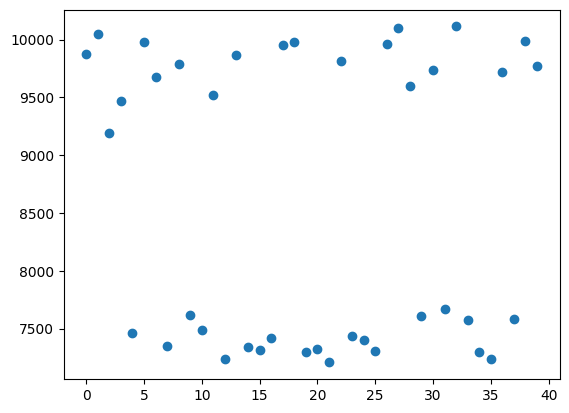

In [97]:
plt.scatter(df_opportunites2.index,df_opportunites2['Prix_au_m2'])
print("Graphique scatter plot des prix au m2 dans le 19e pour l'échantillon:")
plt.show()

In [98]:
uns = 0
zeros = 0
for i in kmeans.labels_[:]:
    if i == 1:
        uns +=i
    else:
        zeros +=1
    
print("Nombre de 1 du K_means:", uns, ". Nombre d 0 du K_means:", zeros)

Nombre de 1 du K_means: 20 . Nombre d 0 du K_means: 20


In [99]:
df_opportunites2['type_local_predict'] = kmeans.labels_[:]
print("Vérification des étiquettes de la prédiction dans le dataframe:")
df_opportunites2

Vérification des étiquettes de la prédiction dans le dataframe:


,Prix_au_m2,type_local_predict
0,9871.444,1
1,10045.572,1
2,9194.698,1
3,9469.142,1
4,7463.610,0
5,9982.017,1
6,9674.263,1
7,7348.917,0
8,9789.051,1
9,7616.421,0


Les résultats du K-Means sont cohérents avec les prix au m2 de l'échantillon, et avec le graphique scatterplot des données de l'échantillon.

Il semblerait que les 1 correspondent aux locaux dont le prix au m2 est le plus élevé (donc les locaux industriels) et les 0 aux locaux dont le prix au m2 est le plus bas (donc les Appartements). Nous allons donc modifier les étiquettes en ce sens.

Nous avons obtenu notre prédiction. Nous pouvons changer les labels et remplacer les valeurs à +1 par Local industriel. commercial ou assimilé et les valeurs à 0 par Appartement.

In [100]:
kmean_result = kmeans.labels_[:]
j=0
k=0
for i in kmean_result:
    if i == 0:
        j+=1
    else:
        k+=1

print('le K-Mean trouve {}'.format(j)+' Appartements dans le 19e arrondissement',
      'dans l\'échantillon et {}'.format(k)+' Locaux Industriels.')


le K-Mean trouve 20 Appartements dans le 19e arrondissement dans l'échantillon et 20 Locaux Industriels.


In [101]:
#On affiche les résultats
kmean_result = kmeans.labels_[:]
mapping = {1:'Local Industriel', 0:'Appartement'}
kmean_result = [mapping[i] for i in kmean_result]
kmean_result
df_opportunites['type_local_kmean'] = kmean_result
print('Définition des types de locaux de l\'échantillon:')
df_opportunites.to_excel('kmeans.xlsx')
df_opportunites

Définition des types de locaux de l'échantillon:


,valeur_fonciere,code_postal,nom_commune,surface_reelle,Prix_au_m2,type_local_kmean
0,868687.083,75019,Paris 19e Arrondissement,88,9871.444,Local Industriel
1,452050.762,75019,Paris 19e Arrondissement,45,10045.572,Local Industriel
2,193088.654,75019,Paris 19e Arrondissement,21,9194.698,Local Industriel
3,303012.549,75019,Paris 19e Arrondissement,32,9469.142,Local Industriel
4,149272.200,75019,Paris 19e Arrondissement,20,7463.610,Appartement
5,179676.305,75019,Paris 19e Arrondissement,18,9982.017,Local Industriel
6,241856.569,75019,Paris 19e Arrondissement,25,9674.263,Local Industriel
7,462981.797,75019,Paris 19e Arrondissement,63,7348.917,Appartement
8,518819.726,75019,Paris 19e Arrondissement,53,9789.051,Local Industriel
9,403670.311,75019,Paris 19e Arrondissement,53,7616.421,Appartement


In [102]:
# On vérifie les données de la prédiction
df_immo.loc[df_immo['code_postal'] == 75019].tail()

,date_mutation,valeur_fonciere,code_postal,code_type_local,type_local,surface_reelle,Prix_au_m2,annee_mutation,days_since_start
23380,2021-12-23,173985.547,75019,2,Appartement,20.000,8699.277,2021,1816
23407,2021-12-23,430592.125,75019,2,Appartement,49.000,8787.595,2021,1816
23398,2021-12-29,780963.938,75019,2,Appartement,88.000,8874.590,2021,1822
23462,2021-12-30,463904.406,75019,4,Local industriel. commercial ou assimilé,48.000,9664.675,2021,1823
23377,2021-12-30,517375.781,75019,4,Local industriel. commercial ou assimilé,53.000,9761.808,2021,1823


In [103]:
# création d'un dataframe à partir de 2 valeurs réelles de df_immo pour tester la prédiction:
df_exemple_19 = pd.DataFrame(columns = ['Prix_au_m2'], index = ['0','1'])
df_exemple_19['Prix_au_m2'] = [9761.808,8699.277]
df_exemple_19

,Prix_au_m2
0,9761.808
1,8699.277


In [104]:
scaled_features_test = scaler.fit_transform(df_exemple_19)
kmeans_2 = kmeans.predict(scaled_features_test)
kmeans_2

array([1, 0])

In [105]:
#On affiche les résultats
mapping = {1:'Local Industriel', 0:'Appartement'}
kmean_result = [mapping[i] for i in kmeans_2]
kmean_result
df_exemple_19['type_local_kmean'] = kmean_result
print('Définition des types de locaux de l\'échantillon:')
df_exemple_19

Définition des types de locaux de l'échantillon:


,Prix_au_m2,type_local_kmean
0,9761.808,Local Industriel
1,8699.277,Appartement


La prédiction du K-Mean se superpose parfaitement aux données réelles de df_immo dans cet exemple.

# Milestone 5 - Analyse et présentation des résultats

Mes conclusions sur l'analyse et les limites de l'exercice :
- Le K-mean est utile quand les données forment 2 ou plusieurs groupes bien distincts, ce qui était le cas pour ces prix au m2 dans le 19e arrondissement. Si on avait des données plus proches les unes des autres, le K-mean ne donnerait peut-être pas d'aussi bons résultats.
  On peut continuer d'utiliser le script avec le K-mean pour classer des échantillons à l'avenir, mais il faudra toujours être prudent et vérifier certains résultats en utilisant une autre méthode.
- Remarque: le K-mean affecte les 1 ou les 0 à l'un ou l'autre groupe de manière aléatoire. Ici les 0 correspondaient aux Appartements, mais ce pourrait être l'inverse sur un autre jeu de données.